D:\DevelopmentTool\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


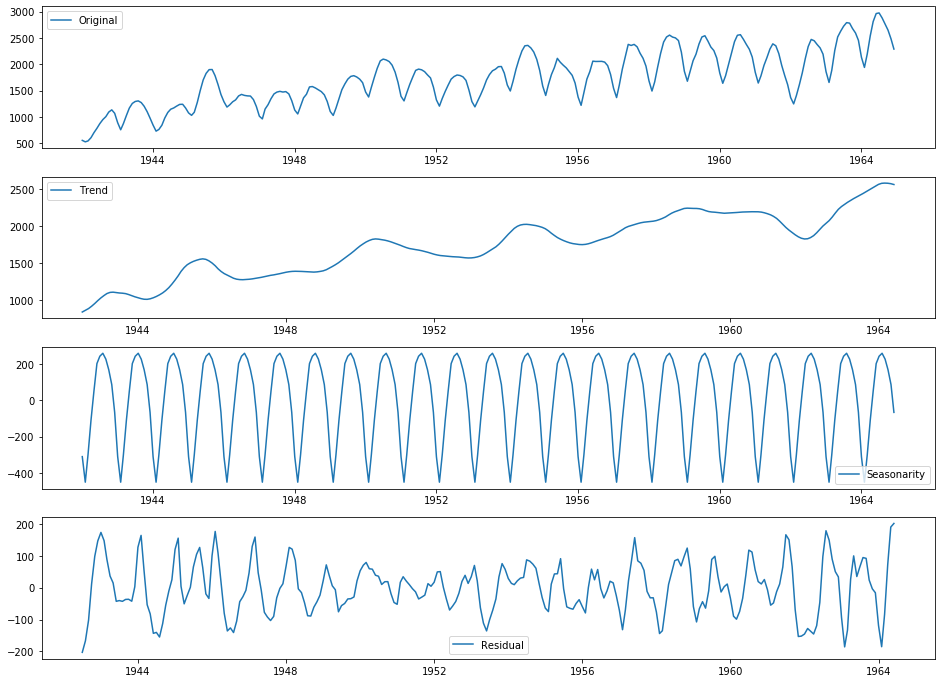

In [1]:
#数据可视化
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()

dateparse = lambda dates: pd.datetime.strptime(str(dates), '%Y-%m-%d')
df = pd.read_csv('timeseries.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)


decomposing(df)

timeseries_adf :  (-0.9837468383430356, 0.7591460150396545, 16, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 2724.583997806133)
timeseries_diff1_adf :  (-5.945824455342615, 2.205528141143045e-07, 16, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 2723.3714927105434)
timeseries_diff2_adf :  (-5.05460258274317, 1.7285354792854033e-05, 14, 261, {'1%': -3.4556556713934934, '5%': -2.872678352489859, '10%': -2.57270548832225}, 2754.9768770788555)


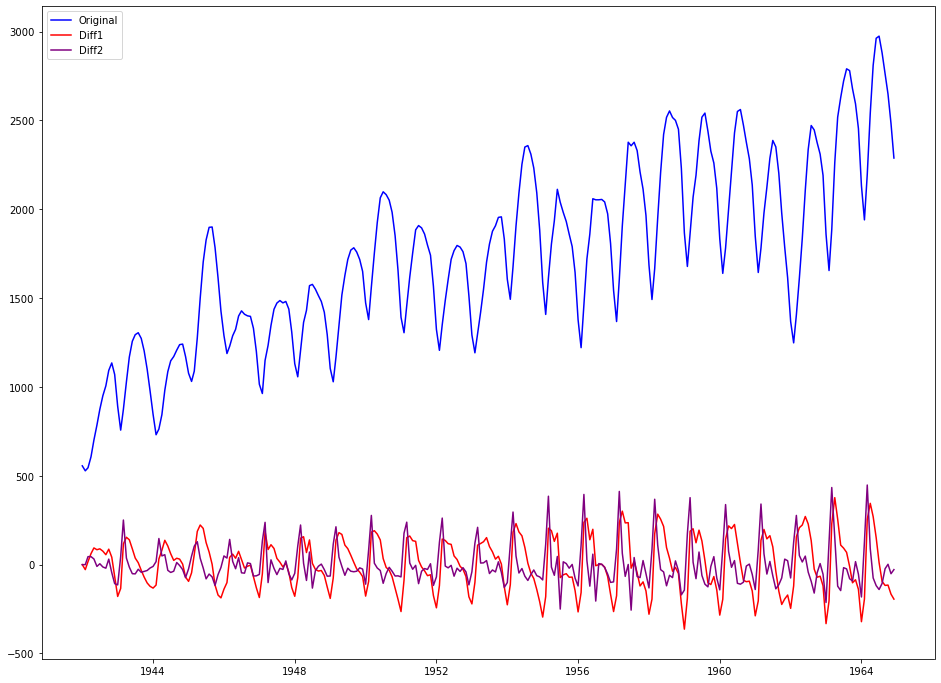

In [2]:
#差分和ADF检验

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF


def diff(timeseries):
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)


    timeseries_adf = ADF(timeseries['value'].tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1['value'].tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2['value'].tolist())

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(16, 12))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()

dateparse = lambda dates: pd.datetime.strptime(str(dates), '%Y-%m-%d')
df1 = pd.read_csv('timeseries.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)


diff(df1)

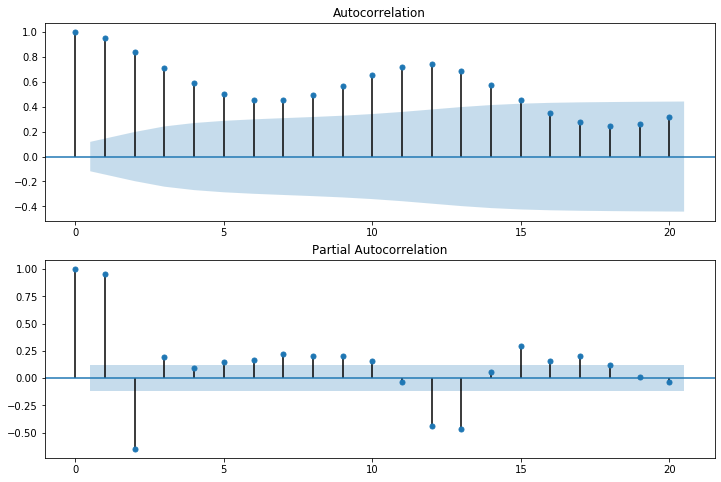

In [3]:
#ACF和PACF

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller as ADF
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()

dateparse = lambda dates: pd.datetime.strptime(str(dates), '%Y-%m-%d')
df2 = pd.read_csv('timeseries.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)

df2_diff1 = df2.diff(1)
df2_diff1 = df2.fillna(0)
autocorrelation(df2_diff1, 20)

In [4]:
#AIC、BIC准则确定模型阶数，BIC比较准确

import statsmodels.api as sm


dateparse = lambda dates: pd.datetime.strptime(str(dates), '%Y-%m-%d')
df3 = pd.read_csv('timeseries.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)

trend_evaluate = sm.tsa.arma_order_select_ic(df2_diff1, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)


D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'avai

trend AIC (4, 2)
trend BIC (4, 2)


#AIC、BIC准则确定模型阶数，BIC比较准确

import statsmodels.api as sm


dateparse = lambda dates: pd.datetime.strptime(str(dates), '%Y-%m-%d')
df3 = pd.read_csv('timeseries.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)

decomposition = seasonal_decompose(df3)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_evaluate = sm.tsa.arma_order_select_ic(trend, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)


In [5]:
from statsmodels.tsa.arima_model import ARIMA

# 4,1,2 ARIMA Model
model = ARIMA(df2, order=(4,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  275
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1580.069
Method:                       css-mle   S.D. of innovations             75.287
Date:                Thu, 05 May 2022   AIC                           3176.137
Time:                        15:51:57   BIC                           3205.071
Sample:                    02-01-1942   HQIC                          3187.749
                         - 12-01-1964                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4464      2.722      2.369      0.019       1.112      11.781
ar.L1.D.value     1.1284      0.096     11.742      0.000       0.940       1.317
ar.L2.D.value    -0.3418      0.168     

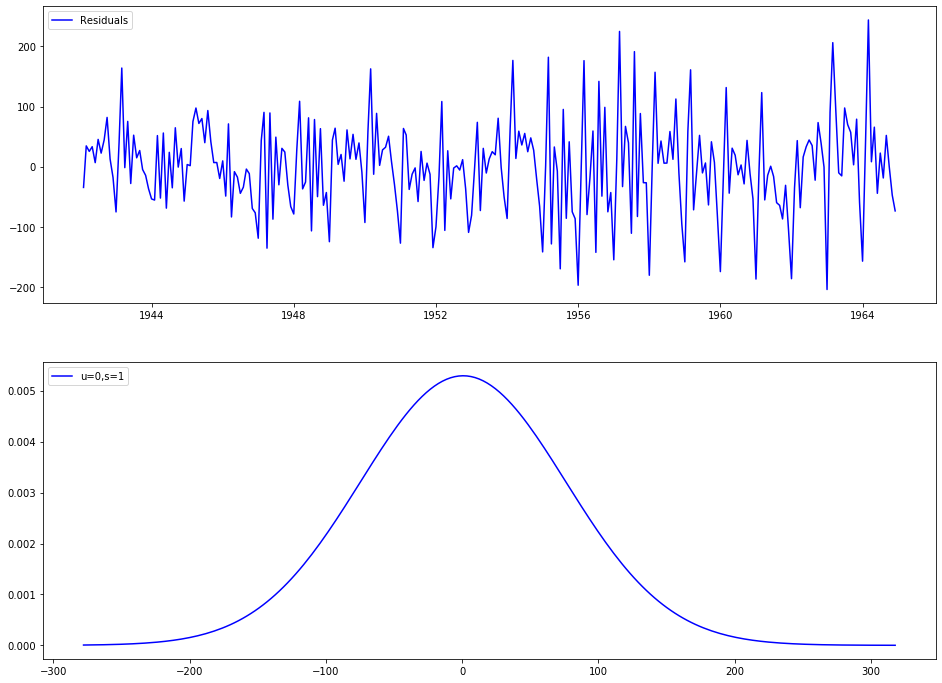

In [6]:
# Plot residual errors
import seaborn as sns
from scipy import stats

residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.plot(residuals,label="Residuals",color = 'blue')
plt.legend()
plt.subplot(212)
sns.distplot(residuals, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'blue', 'label':'u=0,s=1','linestyle':'-'})
plt.legend(loc="upper left")
plt.show()